In [2]:
!wget https://www.dropbox.com/s/n5gw05uk4cgbh9g/MyDataset.zip?dl=0

--2021-07-18 17:45:13--  https://www.dropbox.com/s/n5gw05uk4cgbh9g/MyDataset.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:601b:18::a27d:812
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/n5gw05uk4cgbh9g/MyDataset.zip [following]
--2021-07-18 17:45:13--  https://www.dropbox.com/s/raw/n5gw05uk4cgbh9g/MyDataset.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uce1fc2281f17e596d7ac60964a8.dl.dropboxusercontent.com/cd/0/inline/BSi3DrRQdyyVAFAuAuDL1w4VsPMzADokVhyfoSDY7doHZ4dSbUT01yamLQAbagz5bMJvkGEW5UU5A81IwcjB7TE7bDNrFMaNHWF16196cioNAV8ENXRiFHAbpS2MhTGOPGAU99vvDNGKhuPjO2lf6NHM/file# [following]
--2021-07-18 17:45:14--  https://uce1fc2281f17e596d7ac60964a8.dl.dropboxusercontent.com/cd/0/inline/BSi3DrRQdyyVAFAuAuDL1w4VsPMzADokVhyfoSDY7doHZ4dSbUT01yamLQAbagz5bMJvkGEW5UU5A81Iwc

In [3]:
!unzip covid_19

Archive:  covid_19.zip
   creating: MyDataset/
   creating: MyDataset/Train/
   creating: MyDataset/Train/Covid/
  inflating: MyDataset/Train/Covid/01E392EE-69F9-4E33-BFCE-E5C968654078.jpeg  
  inflating: MyDataset/Train/Covid/03BF7561-A9BA-4C3C-B8A0-D3E585F73F3C.jpeg  
  inflating: MyDataset/Train/Covid/0a7faa2a.jpg  
  inflating: MyDataset/Train/Covid/1-s2.0-S0140673620303706-fx1_lrg.jpg  
  inflating: MyDataset/Train/Covid/1-s2.0-S1684118220300608-main.pdf-001.jpg  
  inflating: MyDataset/Train/Covid/1-s2.0-S1684118220300608-main.pdf-002.jpg  
  inflating: MyDataset/Train/Covid/1-s2.0-S1684118220300682-main.pdf-002-a1.png  
  inflating: MyDataset/Train/Covid/1-s2.0-S1684118220300682-main.pdf-002-a2.png  
  inflating: MyDataset/Train/Covid/1-s2.0-S1684118220300682-main.pdf-003-b1.png  
  inflating: MyDataset/Train/Covid/1-s2.0-S1684118220300682-main.pdf-003-b2.png  
  inflating: MyDataset/Train/Covid/1-s2.0-S2214250920300834-gr1_lrg-b.png  
  inflating: MyDataset/Train/Covid/1-s2.0-S

In [4]:
TRAIN_PATH = "MyDataset/Train"
VAL_PATH = "MyDataset/Val"


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image 

In [6]:
#CNN based model in keras

model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy,optimizer = 'adam', metrics= ['accuracy'])






In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 64)      0         
_________________________________________________________________
dropout (Dropout)            (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 54, 54, 64)        0

In [8]:
#Train from scratch

train_datagen = image.ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,

)

test_dataset = image.ImageDataGenerator(rescale=1./255)

In [9]:
train_generator = train_datagen.flow_from_directory(
    
    'MyDataset/Train',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary'
)

Found 312 images belonging to 2 classes.


In [11]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [12]:
validation_generator = test_dataset.flow_from_directory(
    
    'MyDataset/Val',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary'
)

Found 81 images belonging to 2 classes.


In [16]:
hist = model.fit_generator(
    train_generator,
    steps_per_epoch = 8,
    epochs = 10,
    validation_data = validation_generator,
    validation_steps = 2
)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
8/8 [==============================] - 83s 10s/step - loss: 0.3636 - accuracy: 0.8226 - val_loss: 0.2848 - val_accuracy: 0.9219
Epoch 2/10
8/8 [==============================] - 83s 10s/step - loss: 0.4235 - accuracy: 0.8555 - val_loss: 0.3203 - val_accuracy: 0.9375
Epoch 3/10
8/8 [==============================] - 81s 10s/step - loss: 0.4228 - accuracy: 0.8468 - val_loss: 0.3231 - val_accuracy: 0.9375
Epoch 4/10
8/8 [==============================] - 80s 10s/step - loss: 0.3738 - accuracy: 0.8911 - val_loss: 0.2753 - val_accuracy: 0.9688
Epoch 5/10
8/8 [==============================] - 80s 10s/step - loss: 0.2926 - accuracy: 0.8871 - val_loss: 0.2084 - val_accuracy: 0.9531
Epoch 6/10
8/8 [==============================] - 80s 10s/step - loss: 0.3532 - accuracy: 0.8629 - val_loss: 0.2636 - val_accuracy: 0.9375
Epoch 7/10
8/8 [==============================] - 80s 10s/step - loss: 0.3717 - accuracy: 0.8750 - val_loss: 0.2789 - val_accuracy: 0.9375
Epoch 8/10
8/8 [===========

In [17]:
model.save("model_adv.h5")

In [18]:
model.evaluate_generator(train_generator)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1948: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[0.24666976928710938, 0.9487179517745972]

In [19]:
model.evaluate_generator(validation_generator)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1948: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[0.2585659325122833, 0.9506173133850098]

In [20]:
#Testing images

In [21]:
model = load_model('model_adv.h5')

In [22]:
import os

In [23]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [38]:
y_actual = []
y_test = []

In [39]:
for i in os.listdir("./MyDataset/Val/Normal/"):
  img = image.load_img("./MyDataset/Val/Normal/"+i, target_size=(224,224))
  img = image.img_to_array(img)
  img = np.expand_dims(img, axis =0)
  p = model.predict_classes(img)
  y_test.append(p[0,0])
  y_actual.append(1)


/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [40]:
for i in os.listdir("./MyDataset/Val/Covid/"):
  img = image.load_img("./MyDataset/Val/Covid/"+i, target_size=(224,224))
  img = image.img_to_array(img)
  img = np.expand_dims(img, axis =0)
  p = model.predict_classes(img)
  y_test.append(p[0,0])
  y_actual.append(0)


/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [41]:
y_actual = np.array(y_actual)
y_test = np.array(y_test)

In [42]:
from sklearn.metrics import confusion_matrix

In [43]:
cm = confusion_matrix(y_actual, y_test)


In [44]:
import seaborn as sns

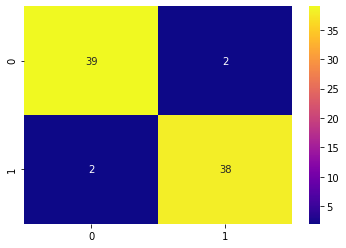

In [45]:
sns.heatmap(cm,cmap="plasma",annot=True)